**Task 4: Ensemble with Adaboost**

1. Pick a classification dataset from Kaggle (e.g., "Breast Cancer Wisconsin" or "Heart Disease").
2. Load and preprocess (standardize features, handle missing values).
3. Split into training and test sets.
4. Train a base model (e.g., DecisionTreeClassifier with max_depth=1, a stump).
5. Train an AdaBoostClassifier with the base model (e.g., n_estimators=50).
6. Predict with both models, compute accuracy or ROC-AUC.
7. Compare performance in a table or plot (e.g., bar chart).
8. **🔹 Expected Output:** A comparison table/plot of base vs. Adaboost performance.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer

In [64]:
data=load_breast_cancer()
df=pd.DataFrame(data.data ,columns=data.feature_names)
y=data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [66]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [67]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

In [69]:
adaboost_model=AdaBoostClassifier(base_model,n_estimators=50,random_state=42)
adaboost_model.fit(X_train,y_train)
y_pred_adaboost=adaboost_model.predict(X_test)

c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [70]:
accuracy_base = accuracy_score(y_test, y_pred_base)
roc_auc_base = roc_auc_score(y_test, y_pred_base)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)

In [71]:

comparison_df = pd.DataFrame({
    "Model": ["Base Decision Tree", "AdaBoost"],
    "Accuracy": [accuracy_base, accuracy_adaboost],
    "ROC-AUC": [roc_auc_base, roc_auc_adaboost]
})

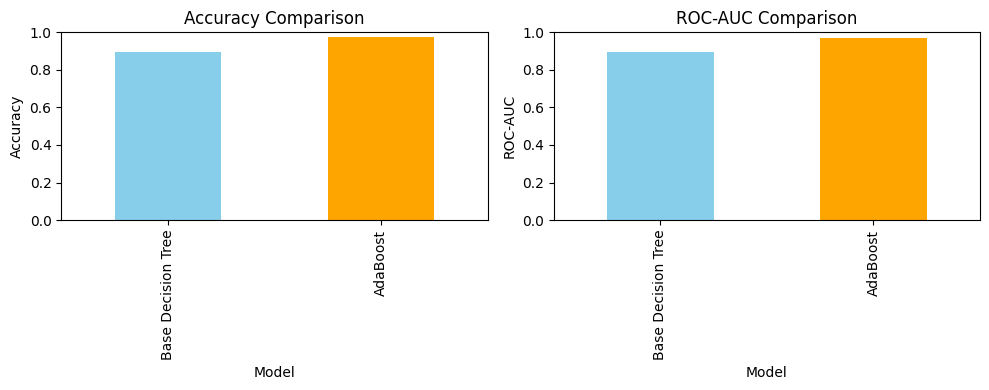

                Model  Accuracy   ROC-AUC
0  Base Decision Tree  0.894737  0.897150
1            AdaBoost  0.973684  0.969702


In [72]:


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
comparison_df.set_index("Model")["Accuracy"].plot(kind="bar", ax=ax[0], legend=False, color=["skyblue", "orange"])
ax[0].set_title("Accuracy Comparison")
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("Accuracy")

comparison_df.set_index("Model")["ROC-AUC"].plot(kind="bar", ax=ax[1], legend=False, color=["skyblue", "orange"])
ax[1].set_title("ROC-AUC Comparison")
ax[1].set_ylim(0, 1)
ax[1].set_ylabel("ROC-AUC")

plt.tight_layout()
plt.show()

print(comparison_df)
